In [189]:
import numpy as np
import matplotlib.pyplot as plt

In [190]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
Y = np.array([2, 4, 5, 4, 5, 8, 10, 9, 12, 14])

In [187]:
class LinearRegression:
    def __init__(self):
      self.lr = float(input("Enter the learning rate: "))
      self.epochs = int(input("Enter the number of Epochs: "))
      self.loss_p = int(input("Enter the no. of iterations after which you want to print loss function: "))
      if self.epochs == 0:
        self.epochs =100000
      self.weights = None

    def hypothesis(self, X):
        return np.dot(X, self.weights.T)

    def cost_func(self, Y, X):
        predictions = self.hypothesis(X)
        error = ((Y - predictions) ** 2)
        return np.mean(error)

    def der_cost_func(self, Y, X):
        predictions = self.hypothesis(X)
        derivative = -2 * np.mean((Y - predictions)[:, np.newaxis] * X, axis=0)
        return derivative

    def gradient_descent(self, Y, X):
        derivative = self.der_cost_func(Y, X)
        new_weights = self.weights - self.lr * derivative
        self.weights = new_weights

    def train(self, X, Y):
        m, d = X.shape
        self.weights = np.zeros(d + 1)
        ones_column = np.ones((m, 1))
        X = np.concatenate((ones_column, X), axis=1)

        for iteration in range(1, self.epochs + 1):
            cost = self.cost_func(Y, X)

            if self.loss_p !=0 and iteration % self.loss_p == 0:
                print("Epoch: ", iteration, "  Loss: ", cost)

            self.gradient_descent(Y, X)

    def predict(self, X):
        ones_column = np.ones((X.shape[0], 1))
        X = np.concatenate((ones_column, X), axis=1)
        return self.hypothesis(X)

    def get_weights(self):
        print("Weights are: ", self.weights)

In [183]:
model = LinearRegression()
model.train(X, Y)

predictions = model.predict(X)

Enter the learning rate: 0.01
Enter the number of Epochs: 0
Enter the no. of iterations after which you want to print loss function: 0


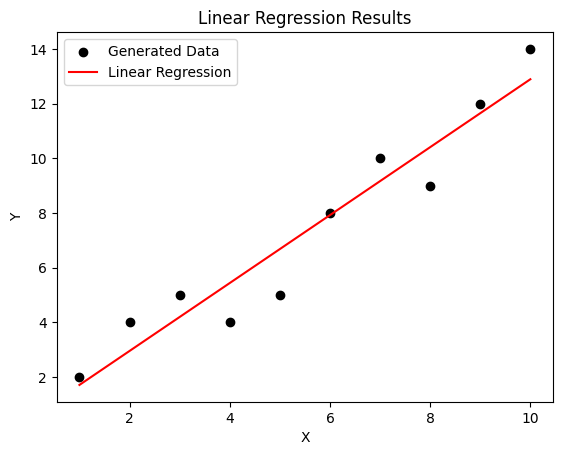

In [186]:
plt.scatter(X, Y, color='black', label='Generated Data')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Results')
plt.legend()
plt.show()

In [184]:
model.get_weights()

Weights are:  [0.46666667 1.24242424]
